# Coding guide

This document provides guidance on how to write code for your essay.

## Code
Your code should be correct, simple, and as readable as possible.
Unless the aim of your essay is to discuss advanced Python constructs,
try to use only a basic subset of the language. This allows more people,
including those with limited knowledge of Python, to understand your code.
It also makes your code easier to port to other programming languages.

We recommend the following workflow, which is further explained in the following subsections.

1. Write the tests for your algorithms.
2. Implement the algorithms and run the tests.
3. Typecheck your code as you run each cell.
4. Format your code, cell by cell.
5. Check the code style as you run each cell.

Writing the tests (step 1) *before* the code they test (step 2) is a cornerstone of
**test-driven development**, a widely used practice. Thinking of the tests early
in the process helps you better understand the problem and think of correct solutions.

<div class="admonition info">
  <p class="admonition-title">Info</p>
  <p>
    If you followed our 'getting started' instructions, the software mentioned
    in the next subsections to carry out the above workflow is already installed.
  </p>
</div>

## Testing
You should write tests for each function, to have some assurance that it is correct.
Tests that check the behaviour of a single function are called **unit tests**.
The unit tests should cover normal cases and **edge cases**: extreme input values and
inputs that lead to extreme output values.

For each input, the smallest possible value, e.g. zero or the empty list, is an edge case,
and so is the largest possible value, if there is one for that input.
If a function is doing a search for an item in a list, then edge cases would be the item being
at the start, at the end, or not occurring at all.
If the output is a list, then inputs that produce the empty list are edge cases too.
In summary, try to think of the 'trickiest' inputs the algorithm has to cope with.

We provide a small library to support algorithmic essays: `algoesup`.
It allows you to easily write and run unit tests. Here's an example.
(The `# fmt: off` and `# fmt: on` lines will be explained later.)

In [1]:
from algoesup import test

# function to be tested
def absolute_difference(x: int, y: int) -> int:
    """Return the absolute value of the difference between x and y."""
    return x - y  # deliberately wrong, should be abs(x - y)

# fmt: off
# unit tests in tabular form, one test per row
unit_tests = [
    # test case,  x,    y,    expected result
    ("x == y",    1,    1,    0),
    ("x > y",     10,   -1,   11),
    ("x < y",     -1,   10,   11),
]
# fmt: on

# run the function on all test inputs and compare the actual and expected outputs
test(absolute_difference, unit_tests)

Testing absolute_difference...
x < y FAILED: -11 instead of 11
Tests finished: 2 passed (67%), 1 failed.


A unit test consists of the input values to pass to your function and the output value you're expecting.
The library requires a short descriptive string for each unit test, so that it can indicate which tests failed.
The library expects unit tests to be in tabular format: one row per test, and
one column for the description, one column for each input, and one column for the expected output.
In the example above, the test table is a list of tuples, but it could as well be
a list of lists, a tuple of lists, or a tuple of tuples.

You should reuse the test table for *all* solutions, because they're about the *same* problem.
Here's a correct function that passes all test cases.

In [2]:
def absolute_difference_without_abs(x: int, y: int) -> int:
    """Return the absolute value of the difference between x and y.

    This solution doesn't use the built-in abs() function.
    """
    if x > y:
        return x - y
    else:
        return y - x

test(absolute_difference_without_abs, unit_tests) # same test table

Testing absolute_difference_without_abs...
Tests finished: 3 passed (100%), 0 failed.


The `test()` function checks that the table is well-formed, before it runs the tests.
Among other things, it checks that each test is a sequence (list or tuple) with
a string followed by one or more values.

In [3]:
wrong_tests = [
    {},
    ["x == y"],
    (1,    1,    0),
    ("x > y",     10,   -1),
    ("x < y",     -1,   10,   11),
]

test(absolute_difference, wrong_tests)

Error: test 1 must be a list or tuple.
Error: test 2 must have two or more elements.
Error: test 3 must have a string as first element.
Error: test 'x > y' must have 2 input(s) (1 given).
absolute_difference was NOT tested.


## Type checking
As the above examples show, your code should contain type hints
like `x: int` and `... -> int` to indicate the type of the input and of the output.
They make your code easier to understand, and help type checkers detect any type mismatches,
like passing a string instead of an integer.

<div class="admonition tip">
  <p class="admonition-title">Tip</p>
  <p>
    The <code>mypy</code> type checker provides a handy summary of Python's
    <a href="https://mypy.readthedocs.io/en/stable/cheat_sheet_py3.html">type hints</a>.
  </p>
</div>

To type check each code cell of your notebook,
you must first load an extension included in the `algoesup` library.

In [4]:
%load_ext algoesup.magics

(Magics are special commands that can change the behaviour of running a code cell.)
You can now turn on type checking as follows.

In [5]:
%pytype on

pytype was activated


Words that start with `%` are special commands ('magics') for IPython, 
the Python interpreter used by Jupyter notebooks.
The `%pytype` command, provided by our library, 
activates Google's [pytype](https://google.github.io/pytype) type checker.

Once the type checker is activated, it checks each cell immediately after it's executed.
In this way you can detect and fix errors as you write and run each code cell.
Here's an example of what happens.

In [6]:
def double(x: int) -> int:
    """Return twice the value of x."""
    return x * 2

double([4])

[4, 4]

**pytype** found issues:

- 5: Function double was called with the wrong arguments \[[wrong-arg-types](https://google.github.io/pytype/errors.html#wrong-arg-types)\]

The function is executed and produces an output because lists can also be 'multiplied' with an integer,
but the type checker detects that line 5 should have passed integers, not lists of integers, to the function.
Clicking on the error name in square brackets leads you to `pytype`'s website, with more info.

When a type checker only processes one cell at a time, it is missing the wider context,
like the previously defined functions. Therefore, `pytype` won't spot all type errors.
However, some checking is better than no checking.

The type checker adds some seconds to the overall time to run each code cell.
You may thus wish to initially turn off the type checking, with `%pytype off`,
and only turn it on after all code is written and tested.
You will have to run all cells of your notebook for the type checking to take place.

For a list of all the options for the `%pytype` command,
see the [library reference](../library/#algoesup.magics.pytype).

## Formatting
<div class="admonition note">
  <p class="admonition-title">Note</p>
  <p>This subsection only applies to Deepnote.</p>
</div>

Once you have written, tested and type checked all your code, you should format it so that
it follows the Python community's code style.
You will need to format each cell, as explained [here](deepnote-how-to.md#format-a-code-cell).

If there's a block of code that you don't want the formatter to change,
write `# fmt: off` on its own line before the block and write `# fmt: on` after the block,
to temporarily switch off formatting for that block.
This feature is especially useful for keeping the format of unit test tables,
as shown in an earlier example.

The Deepnote formatter automatically enforces simple formatting conventions, like
4 spaces for indentation and 2 empty lines between functions,
so you will see fewer warnings in the next stage.

<div class="admonition info">
  <p class="admonition-title">Info</p>
  <p>
    We suspect Deepnote enforces
    <a href="https://black.readthedocs.io/en/stable/the_black_code_style/current_style.html">
    <em>Black</em>'s code style</a>.
  </p>
</div>

## Linting
You should **lint** your code, which means to check it for style violations.

<div class="admonition tip">
  <p class="admonition-title">Tip</p>
  <p>
    You may wish to skim at some point the Python
    <a href="https://peps.python.org/pep-0008">code style</a> and
    <a href="https://peps.python.org/pep-0257">docstring conventions</a>.
  </p>
</div>

### Code style
Our library supports [Ruff](https://docs.astral.sh/ruff), the fastest Python linter.
To turn it on, write the following after loading the `algoesup.magics` extension.

In [7]:
%ruff on

ruff was activated


From now on, each cell is automatically linted after it's executed. Here's an example:

In [8]:
l = [1, 2, 3]
if (not 5 in l) == True:
    print("5 isn't in the list")

5 isn't in the list


**ruff** found issues:

- 1: \[[E741](https://docs.astral.sh/ruff/rules/ambiguous-variable-name)\] Ambiguous variable name: `l`
- 2: \[[E712](https://docs.astral.sh/ruff/rules/true-false-comparison)\] Avoid equality comparisons to `True`; use `if not 5 in l:` for truth checks. Suggested fix: Replace with `not 5 in l`
- 2: \[[PLR2004](https://docs.astral.sh/ruff/rules/magic-value-comparison)\] Magic value used in comparison, consider replacing `5` with a constant variable
- 2: \[[E713](https://docs.astral.sh/ruff/rules/not-in-test)\] Test for membership should be `not in`. Suggested fix: Convert to `not in`

Every message indicates the line of the problem.

- Issue E741: `l` can be misread for `1` (one).
- Issues E712 and E713: `if (not 5 in l) == True` should be simply `if 5 not in l`
- Issue PLR2004 recommends using constants, like `EXPECTED_VALUE`,
  instead of literals like 5 that are meaningless to the reader.

As this code cell shows, Ruff sometimes suggests how to fix the reported error,
but you must consider whether the suggestion is appropriate.

If you don't understand an error message, like the first one, click on
the error code in brackets, to get more information from Ruff's website.

Like for type checking, linting one cell at a time means that the linter is
unaware of the wider context of your code. For example, in notebooks,
variables may be defined in one cell but used in a later cell. As the linter
checks each cell separately, it would report an undefined variable in the later cell.
We have disabled checks for undefined variables and other checks that would lead to
irrelevant error messages in notebooks, which means that genuine undefined variables
won't be flagged. But again, some linting is better than none.

If you get errors that you think are irrelevant,
you can disable them with the `--ignore` option:
see the [library reference](../library/#algoesup.magics.ruff).

### Language subset
Our library also supports the [allowed](https://dsa-ou.github.io/allowed) linter, created by ourselves.
It checks whether your code only uses a certain subset of the Python language.
This gives you some reassurance that your code will be understood by a wide audience.

By default, `allowed` checks against the Python subset used in our
algorithms and data structures course.
So, if you're an M269 student, to check that your essay is easily understood
by your peers in terms of Python constructs, just add the following after loading the extension:

In [9]:
%allowed on

allowed was activated


Henceforth, after a cell is executed, the `allowed` linter will list any constructs,
modules or built-in types we haven't taught, like this:

In [10]:
from math import pi, sin

print(f"π is approximately {pi:.5f}.")

π is approximately 3.14159.


**allowed** found issues:

- 1: sin
- 3: f-string

We haven't taught the `math.sin()` function nor f-strings, and `allowed` reports these.

Any line that ends with the comment `# allowed` is ignored. This is useful when
you don't want the linter to flag a construct that you explain in your essay.
For example, adding the comment after `print(...)` would not report the f-string.
Note that the comment makes the tool skip the *whole* line:
if it has several constructs that weren't taught, none of them is reported.

The `allowed` linter also includes the configuration for TM112, our introductory Computing course,
in case you want to use even fewer constructs in your essay.
To use that configuration, write `%allowed on --config tm112.json`.
For a list of all the options for the `%allowed` command,
see the [library reference](../library/#algoesup.magics.allowed).

You can configure the linter with a JSON file that lists the allowed constructs.
See the `allowed` [website](https://dsa-ou.github.io/allowed) for instructions.

<div class="admonition tip">
  <p class="admonition-title">Deepnote</p>
  <p>
    <a href="../deepnote-how-to/#rename-duplicate-download-or-delete-a-notebook-or-file">Rename</a>
    the <code>allowed.json</code> configuration in the <strong>Files</strong> section of your project,
    and adapt it to your course.
  </p>
</div>


## Performance analysis
Complexity analysis gives an indication of how the run-times will grow as the inputs grow,
but it can't predict the exact run-times nor which algorithm is in practice fastest.

Our library helps measure and plot the run-times of one function on different kinds of input,
or of different functions on the same inputs.

For example, let's suppose our essay is about sorting algorithms and we have implemented selection sort.

In [11]:
def selection_sort(values: list[int]) -> list[int]:
    """Return a copy of the values, in ascending order."""
    result = values[:]
    for current in range(len(result) - 1):
        # select the smallest element in result[current:] ...
        smallest = current
        for index in range(current + 1, len(result)):
            if result[index] < result[smallest]:
                smallest = index
        # ... and swap it with the current element
        result[current], result[smallest] = result[smallest], result[current]
    return result

### Generating inputs
To measure the run-times of sorting algorithms on increasingly large lists,
we must implement functions that generate such lists. For example, we can write
a function that generates lists that are already in ascending order,
which is a best case for many sorting algorithms, and
a function that generates lists that are in descending order,
which is a worst case for some sorting algorithms.

The library expects such input-generating functions to take a non-negative integer *n*,
and to produce a tuple of input values, with total size *n*. Why a tuple?
Although our sorting algorithm takes a single input (a list of integers),
many algorithms take more than one input. Thus the input-generating functions must
generate a tuple of inputs, in the same order as expected by the algorithm.

In [12]:
def ascending(n: int) -> tuple[list[int]]:
    """Return a list of n integers in ascending order."""
    return (list(range(1, n + 1)),)  # trailing comma to make it a tuple

def descending(n: int) -> tuple[list[int]]:
    """Return a list of n integers in descending order."""
    return (list(range(n, 0, -1)),)

We should of course test these functions, to make sure they produce the expected lists,
but we will skip that in this explanation because we're focusing on how to measure run-times.

### Comparing cases
To measure the run-times of a function `f`  on best, average and worst case inputs, use
library function `time_cases(f, [case1, case2, ...], s, d)`.
The second argument can be a list (or tuple) of up to 6 input-generating functions.
The `time_cases` function works as follows.

1. Call `case1(s)` to generate inputs of size `s` for `f`.
2. Run function `f` on the generated inputs and measure its run-time.
3. Do the two previous steps with each of the functions `case2, ...`.
4. Set `s` to double its value and go back to step 1.

The whole process stops when `s` has been doubled `d` times.
If `d` is zero, the run-times are only measured for size `s`.

Here's how we could measure the run-times for selection sort on ascending and descending lists.
(The `algoesup` library is not part of `allowed`'s default configuration,
so we must explicitly allow importing it.)

In [13]:
from algoesup import time_cases  # allowed

time_cases(selection_sort, [ascending, descending], start=100, double=4)

Run-times for selection_sort

Input size       ascending      descending 
       100           169.7           175.3 µs
       200           648.2           669.2 µs
       400          2753.9          2793.3 µs
       800         11090.6         11394.8 µs
      1600         44514.4         46000.9 µs

Running selection sort on lists from 100 to 1600 integers takes about 170 microseconds to 45 milliseconds.
To measure precisely such small time spans, function `f` (here, `selection_sort`) is called
multiple times on the same input, within a loop, and the total time is divided by
the number of iterations, to obtain a better estimate of the time taken by a single call to `f`.
The whole process is repeated 3 times, because the run-times will vary due to other processes running on the computer.
The lowest of the 3 run-times is reported.

Because function `f` is called multiple times, it is very important that `f` **does *not* modify its inputs**.
For example, if `selection_sort` sorted the list in-place, instead of returning a new list,
then the first call would put the numbers in ascending order, and the subsequent calls
would just try to sort an already sorted list, swapping no numbers.
We would obtain almost exact same times for ascending and descending input lists,
instead of always larger times for descending lists, as shown above.

When executing a code like the previous one, be patient while waiting for the results.
Even though each call may just take a few milliseconds or less, the code cell will take several seconds or
even minutes to execute, because the function is called many times to make the measurements more robust.

### Comparing functions
Our library also allows you to compare different algorithms for the same input case.
For that, use `time_functions([f1, f2, ...], case, s, d)`, which does the following:
1. Call `case(s)` to generate inputs of total size `s`.
2. Call each function `f1`, `f2`, etc. on the generated inputs and measure their run-times.
3. Double the value of `s` and go to step 1, unless `s` has been doubled `d` times.

The run-times are measured as for `time_cases`: take the best of 3 run-times, each obtained by
calling the function within a loop and dividing the total time by the number of iterations.

Here's a comparison of the built-in `sorted` function against selection sort, on descending lists.

In [14]:
from algoesup import time_functions  # allowed

time_functions([selection_sort, sorted], descending, start=100, double=4)

Inputs generated by descending

Input size  selection_sort          sorted 
       100           174.4             0.5 µs
       200           665.8             0.8 µs
       400          2791.3             1.6 µs
       800         11571.4             3.0 µs
      1600         45668.4             5.9 µs

As expected, the built-in sorting implementation is much, much faster.

### Charting run-times
If you add argument `chart=True` to `time_cases` or `time_functions`, then
you will see a line chart of the run-times, in addition to the exact run-times.
If you only want to see the chart, then add arguments `text=False, chart=True`.

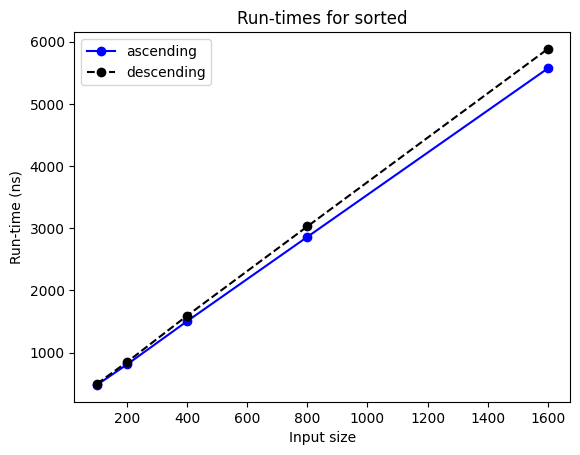

In [15]:
time_cases(sorted, [ascending, descending], 100, 4, text=False, chart=True)

Inputs generated by ascending

Input size          sorted  selection_sort 
       100           482.7        169979.4 ns
       200           810.5        656874.5 ns
       400          1529.9       2763873.3 ns
       800          2859.4      11138172.9 ns
      1600          5600.9      44486733.2 ns

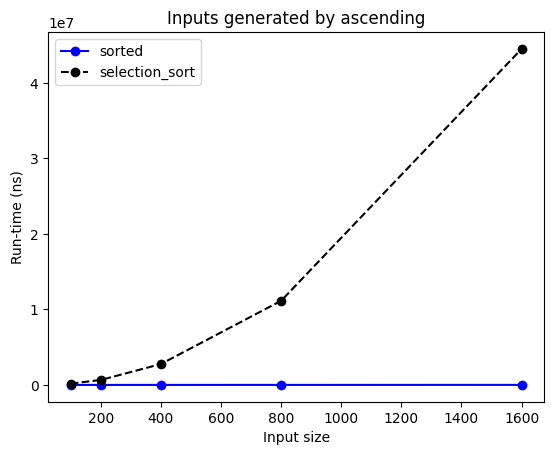

In [16]:
time_functions([sorted, selection_sort], ascending, 100, 4, chart=True)

The `1e7` above the y-axis means that the run-times must be multiplied by 10⁷, i.e. 10 million.

Note that when calling `time_functions([selection_sort, sorted], ...)` in the previous section,
the run-times were reported in microseconds,
but when calling `time_functions([sorted, selection_sort], ...)` in this section, they were in nanoseconds.
The reason is that the library chooses the time unit based on the first run-time measured.
If there's a big time difference between the fastest and slowest cases or algorithms,
you may wish for the first function in the list to be the *slowest* one, to report it with
small values in a 'large' time unit, instead of very large values in a 'small' time unit.
So, in `time_functions([f1, f2, ...], case, ...)` the slowest function should be `f1`,
and in `time_cases(f, [case1, case2, ...], ...)` the worst case should be `case1`.

### Interpreting run-times
If, as the input size doubles, the run-times...

- ...remain the same, then the function has constant complexity.
- ...also double, then the function has linear complexity.
- ...quadruple, then the function has quadratic complexity.
- ...increase by a fixed amount, then the function has logarithmic complexity.

Looking at the run-times reported in the previous subsections, we can see that
`sorted` is linear because the run-times about double when the input size doubles,
whereas selection sort is quadratic because the run-times increase about 4-fold when the input size doubles.

Remember that run-times vary every time you execute a cell because the computer
is executing other processes. This may lead to the odd behaviour here and there.
For example, we have noted that `sorted` is occasionally faster for *descending* lists,
which is counter-intuitive because it does have to reverse them.

If you can't see any trend in the run-times, or they aren't what you expect,
one possible cause is that the input sizes are too small.
Increase `start` and run again the code cell.

If after increasing the start size several times you still don't get the run-times
you expect from your complexity analysis, then there might be other explanations:

- your complexity analysis is wrong
- your implemented algorithm modifies its input
- your input-generating functions are not generating best or worst cases.

For an example of the latter, see the [Jewels and Stones](../essays/example-jewels/) essay.

## Final check
Once you finished your code, [check your essay](../writing/#final-check).